##Carregando Dados

In [146]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url='https://raw.githubusercontent.com/SousaPHP/Telecom-X-Challenge-Data-Science-Alura-/refs/heads/main/dataset/TelecomX_Data.json'

In [147]:
base_json=requests.get(url)
df=pd.DataFrame(base_json.json())
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [148]:
df=pd.json_normalize(base_json.json())
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##Verificando Inconsistências nos Dados

In [149]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [151]:
df.isnull().sum()


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [152]:
df.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [153]:
# Converte a coluna account.Charges.Total para float64
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [154]:
# Encontrado valores vazios em Churn
print((df['Churn'] == '').sum())
df[df['Churn'] == '']

224


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [155]:
df.shape

(7267, 21)

In [156]:
# Apaga as linhas onde foram encontrados os valores de Churn vazios
df = df[df['Churn'] != '']
print((df['Churn'] == '').sum())

0


In [157]:
# Encontrando linhas duplicadas
df_linha_duplicada = df.duplicated().sum()
df_linha_duplicada

np.int64(0)

In [158]:
# Muda o tipo das  colunas('Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
#         'phone.MultipleLines',  'internet.OnlineSecurity', 'internet.OnlineBackup',
#         'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
#         'internet.StreamingMovies',  'account.PaperlessBilling') para boleano mudando Yes para True e qualquer outro valor para false
#         Se rodar duas vezes dava erro então adicionei x == True para que não houvesse erro

colunas_converter = ['Churn', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling'
]

for col in colunas_converter:
    df[col] = df[col].apply(lambda x: True if x == 'Yes' or  x == True else False)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   bool   
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   bool   
 5   customer.Dependents        7043 non-null   bool   
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   bool   
 8   phone.MultipleLines        7043 non-null   bool   
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   bool   
 11  internet.OnlineBackup      7043 non-null   bool   
 12  internet.DeviceProtection  7043 non-null   bool   
 13  internet.TechSupport       7043 non-null   bool   
 1

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


In [159]:
# Muda a coluna customer.SeniorCitizen para boleano, sendo 0 para false e 1 para true
# Essa era unica coluna binaria qual tinha 0 e 1, as outras eram as vezes Yes as vezes No.
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype(bool)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   bool   
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   bool   
 4   customer.Partner           7043 non-null   bool   
 5   customer.Dependents        7043 non-null   bool   
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   bool   
 8   phone.MultipleLines        7043 non-null   bool   
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   bool   
 11  internet.OnlineBackup      7043 non-null   bool   
 12  internet.DeviceProtection  7043 non-null   bool   
 13  internet.TechSupport       7043 non-null   bool   
 1

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


In [160]:
# Verificando quais informações aparecem nas colunas account.PaymentMethod, account.Contract e internet.InternetService.
print("Informações da coluna 'account.PaymentMethod':")
print(df['account.PaymentMethod'].value_counts())

print("\nInformações da coluna 'account.Contract':")
print(df['account.Contract'].value_counts())

print("\nInformações da coluna 'internet.InternetService':")
print(df['internet.InternetService'].value_counts())


Informações da coluna 'account.PaymentMethod':
account.PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Informações da coluna 'account.Contract':
account.Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Informações da coluna 'internet.InternetService':
internet.InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


In [161]:
# Transforma o restante das colunas em tipo category.
colunas_categoricas = ['customer.gender', 'internet.InternetService', 'account.Contract', 'account.PaymentMethod']
for col in colunas_categoricas:
    if col in df.columns:
        df[col] = df[col].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7043 non-null   object  
 1   Churn                      7043 non-null   bool    
 2   customer.gender            7043 non-null   category
 3   customer.SeniorCitizen     7043 non-null   bool    
 4   customer.Partner           7043 non-null   bool    
 5   customer.Dependents        7043 non-null   bool    
 6   customer.tenure            7043 non-null   int64   
 7   phone.PhoneService         7043 non-null   bool    
 8   phone.MultipleLines        7043 non-null   bool    
 9   internet.InternetService   7043 non-null   category
 10  internet.OnlineSecurity    7043 non-null   bool    
 11  internet.OnlineBackup      7043 non-null   bool    
 12  internet.DeviceProtection  7043 non-null   bool    
 13  internet.TechSupport       7043 non-nu

In [162]:
# Percebi que a coluna 'account.Charges.Total' tem valores vazios, então estou substituindo eles pela media dos valores da coluna.
if df['account.Charges.Total'].isna().sum() > 0:
    media_cargas_total = df['account.Charges.Total'].mean()
    df['account.Charges.Total'].fillna(media_cargas_total, inplace=True)
else:
    print("Não tem valores vazios.")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7043 non-null   object  
 1   Churn                      7043 non-null   bool    
 2   customer.gender            7043 non-null   category
 3   customer.SeniorCitizen     7043 non-null   bool    
 4   customer.Partner           7043 non-null   bool    
 5   customer.Dependents        7043 non-null   bool    
 6   customer.tenure            7043 non-null   int64   
 7   phone.PhoneService         7043 non-null   bool    
 8   phone.MultipleLines        7043 non-null   bool    
 9   internet.InternetService   7043 non-null   category
 10  internet.OnlineSecurity    7043 non-null   bool    
 11  internet.OnlineBackup      7043 non-null   bool    
 12  internet.DeviceProtection  7043 non-null   bool    
 13  internet.TechSupport       7043 non-nu

<ipython-input-162-1076189120>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





## Coluna Contas Diarias

In [163]:
# Criando a coluna account.Charges.Daily apartir da coluna account.Charges.Monthly
df['account.Charges.Daily'] = df['account.Charges.Monthly'] / 30
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7043 non-null   object  
 1   Churn                      7043 non-null   bool    
 2   customer.gender            7043 non-null   category
 3   customer.SeniorCitizen     7043 non-null   bool    
 4   customer.Partner           7043 non-null   bool    
 5   customer.Dependents        7043 non-null   bool    
 6   customer.tenure            7043 non-null   int64   
 7   phone.PhoneService         7043 non-null   bool    
 8   phone.MultipleLines        7043 non-null   bool    
 9   internet.InternetService   7043 non-null   category
 10  internet.OnlineSecurity    7043 non-null   bool    
 11  internet.OnlineBackup      7043 non-null   bool    
 12  internet.DeviceProtection  7043 non-null   bool    
 13  internet.TechSupport       7043 non-nu

## Padronização e Transformação de Dados
Eu já tinha colocado as colunas com Boleanas então vou apenas trocar o nomes delas, apesar de que eu gostei de como elas estavam.

In [164]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total',
       'account.Charges.Daily'],
      dtype='object')

In [165]:
novos_nomes = {
    'customerID': 'ID_Cliente',
    'Churn': 'Abandono',
    'customer.gender': 'Genero_Cliente',
    'customer.SeniorCitizen': 'Eh_Idoso',
    'customer.Partner': 'Tem_Parceiro',
    'customer.Dependents': 'Tem_Dependentes',
    'customer.tenure': 'Meses_Cliente',
    'phone.PhoneService': 'Assinatura_Tem_Servico_Telefone',
    'phone.MultipleLines': 'Assinatura_Multiplas_Linhas',
    'internet.InternetService': 'Tipo_Servico_Internet',
    'internet.OnlineSecurity': 'Assinatura_Seguranca_Online',
    'internet.OnlineBackup': 'Assinatura_Backup_Online',
    'internet.DeviceProtection': 'Assinatura_Protecao_Dispositivo',
    'internet.TechSupport': 'Assinatura_Suporte_Tecnico',
    'internet.StreamingTV': 'Assinatura_Streaming_TV',
    'internet.StreamingMovies': 'Assinatura_Streaming_Filmes',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Fatura_Digital',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Mensalidade',
    'account.Charges.Total': 'Total_Cobrado',
    'account.Charges.Daily': 'Custo_Diario'
}

df.rename(columns=novos_nomes, inplace=True)

In [166]:
print(df.columns)
df.head()

Index(['ID_Cliente', 'Abandono', 'Genero_Cliente', 'Eh_Idoso', 'Tem_Parceiro',
       'Tem_Dependentes', 'Meses_Cliente', 'Assinatura_Tem_Servico_Telefone',
       'Assinatura_Multiplas_Linhas', 'Tipo_Servico_Internet',
       'Assinatura_Seguranca_Online', 'Assinatura_Backup_Online',
       'Assinatura_Protecao_Dispositivo', 'Assinatura_Suporte_Tecnico',
       'Assinatura_Streaming_TV', 'Assinatura_Streaming_Filmes',
       'Tipo_Contrato', 'Fatura_Digital', 'Metodo_Pagamento', 'Mensalidade',
       'Total_Cobrado', 'Custo_Diario'],
      dtype='object')


,ID_Cliente,Abandono,Genero_Cliente,Eh_Idoso,Tem_Parceiro,Tem_Dependentes,Meses_Cliente,Assinatura_Tem_Servico_Telefone,Assinatura_Multiplas_Linhas,Tipo_Servico_Internet,...,Assinatura_Protecao_Dispositivo,Assinatura_Suporte_Tecnico,Assinatura_Streaming_TV,Assinatura_Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Mensalidade,Total_Cobrado,Custo_Diario
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID_Cliente                       7043 non-null   object  
 1   Abandono                         7043 non-null   bool    
 2   Genero_Cliente                   7043 non-null   category
 3   Eh_Idoso                         7043 non-null   bool    
 4   Tem_Parceiro                     7043 non-null   bool    
 5   Tem_Dependentes                  7043 non-null   bool    
 6   Meses_Cliente                    7043 non-null   int64   
 7   Assinatura_Tem_Servico_Telefone  7043 non-null   bool    
 8   Assinatura_Multiplas_Linhas      7043 non-null   bool    
 9   Tipo_Servico_Internet            7043 non-null   category
 10  Assinatura_Seguranca_Online      7043 non-null   bool    
 11  Assinatura_Backup_Online         7043 non-null   bool    
 12  Assinatura_

##Análise Descritiva

Olhando as medias gerais para ter uma noção de como esses valores estão se comportando.

In [168]:

print(df[['Meses_Cliente', 'Mensalidade', 'Total_Cobrado', 'Custo_Diario']].describe())

       Meses_Cliente  Mensalidade  Total_Cobrado  Custo_Diario
count    7043.000000  7043.000000    7043.000000   7043.000000
mean       32.371149    64.761692    2283.300441      2.158723
std        24.559481    30.090047    2265.000258      1.003002
min         0.000000    18.250000      18.800000      0.608333
25%         9.000000    35.500000     402.225000      1.183333
50%        29.000000    70.350000    1400.550000      2.345000
75%        55.000000    89.850000    3786.600000      2.995000
max        72.000000   118.750000    8684.800000      3.958333


In [169]:
print(df['Tipo_Contrato'].value_counts())
print(df['Tipo_Contrato'].value_counts(normalize=True) * 100)

Tipo_Contrato
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
Tipo_Contrato
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: proportion, dtype: float64


In [170]:
print(df['Tipo_Servico_Internet'].value_counts())
print(df['Tipo_Servico_Internet'].value_counts(normalize=True) * 100)

Tipo_Servico_Internet
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
Tipo_Servico_Internet
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64


Criando gráficos de barra para ver a distribução dos clientes.

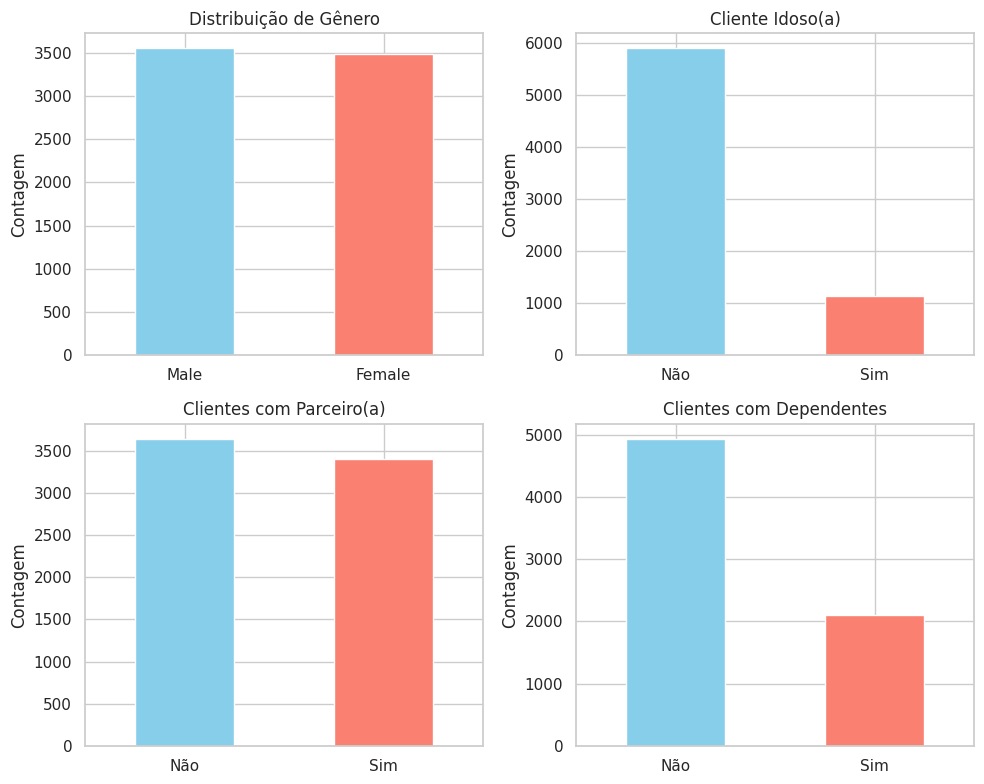

In [171]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

titulos = ['Distribuição de Gênero', 'Cliente Idoso(a)', 'Clientes com Parceiro(a)', 'Clientes com Dependentes']
columns_to_plot = ['Genero_Cliente', 'Eh_Idoso', 'Tem_Parceiro', 'Tem_Dependentes']

for i, col in enumerate(columns_to_plot):
    plot_data = df[col].replace({True: 'Sim', False: 'Não'}) if df[col].dtype == bool else df[col]

    plot_counts = plot_data.value_counts()
    plot_counts.plot(kind='bar', ax=axes[i], color=['skyblue', 'salmon'])
    axes[i].set_title(titulos[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


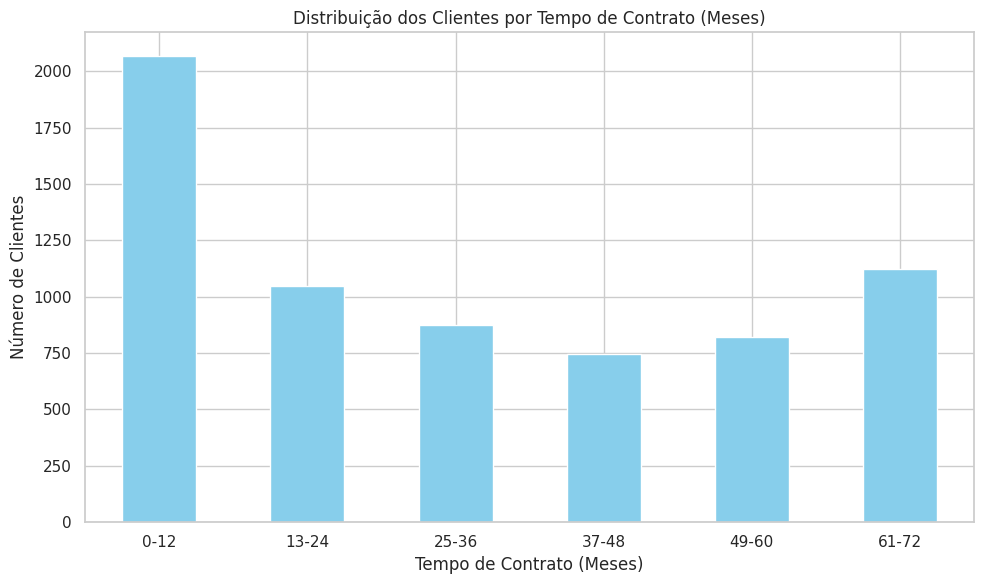

In [172]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
meses_Cliente = pd.cut(df['Meses_Cliente'], bins=bins, labels=labels, right=False)
meses_categoria_counts = meses_Cliente.value_counts().sort_index()

plt.figure(figsize=(10, 6))
meses_categoria_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição dos Clientes por Tempo de Contrato (Meses)')
plt.xlabel('Tempo de Contrato (Meses)')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

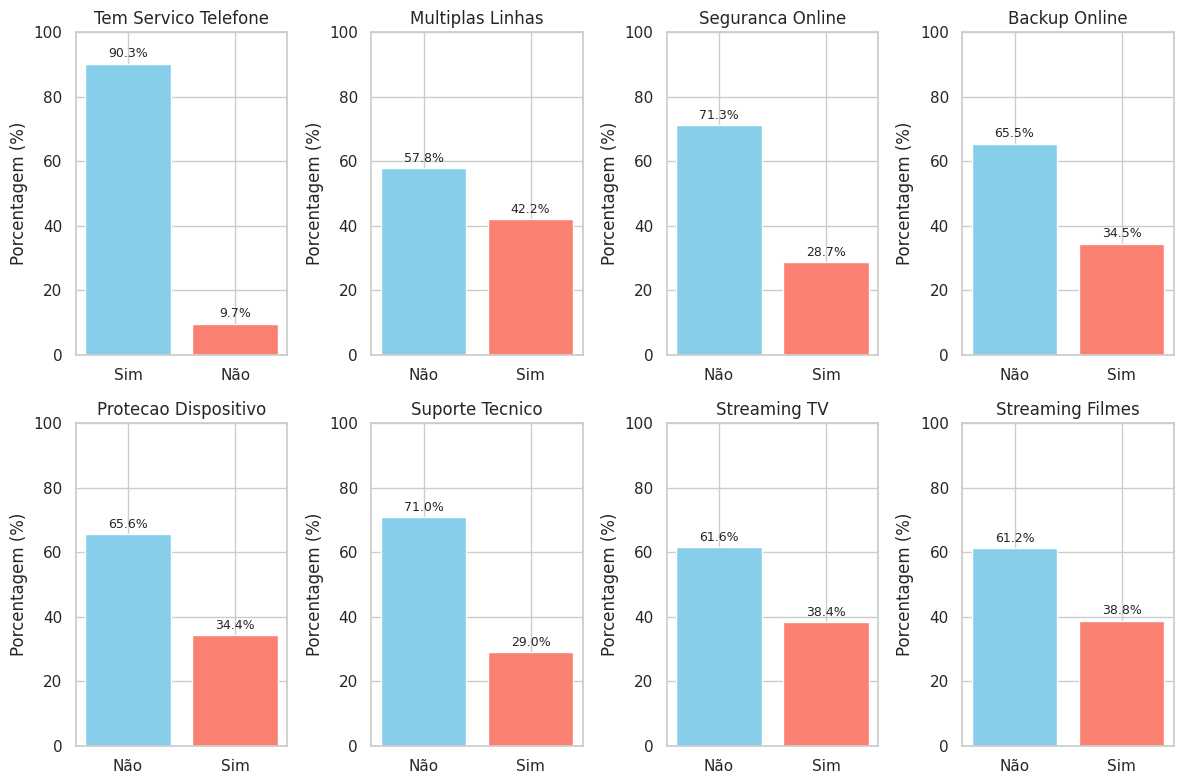

In [173]:
colunas_assinatura = [
    'Assinatura_Tem_Servico_Telefone',
    'Assinatura_Multiplas_Linhas',
    'Assinatura_Seguranca_Online',
    'Assinatura_Backup_Online',
    'Assinatura_Protecao_Dispositivo',
    'Assinatura_Suporte_Tecnico',
    'Assinatura_Streaming_TV',
    'Assinatura_Streaming_Filmes'
]

plt.figure(figsize=(12, 8))

for i, col in enumerate(colunas_assinatura):
    plt.subplot(2, 4, i + 1)
    porcentagens = df[col].value_counts(normalize=True) * 100
    porcentagens.index = porcentagens.index.map({True: 'Sim', False: 'Não'})
    bars = plt.bar(porcentagens.index, porcentagens.values, color=['skyblue', 'salmon'])
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%',
                 ha='center', va='bottom', fontsize=9)

    plt.ylim(0, 100)
    plt.title(col.replace('Assinatura_', '').replace('_', ' '))
    plt.xlabel('')
    plt.ylabel('Porcentagem (%)')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


Grafico em pizza mostrando o numero de abandono

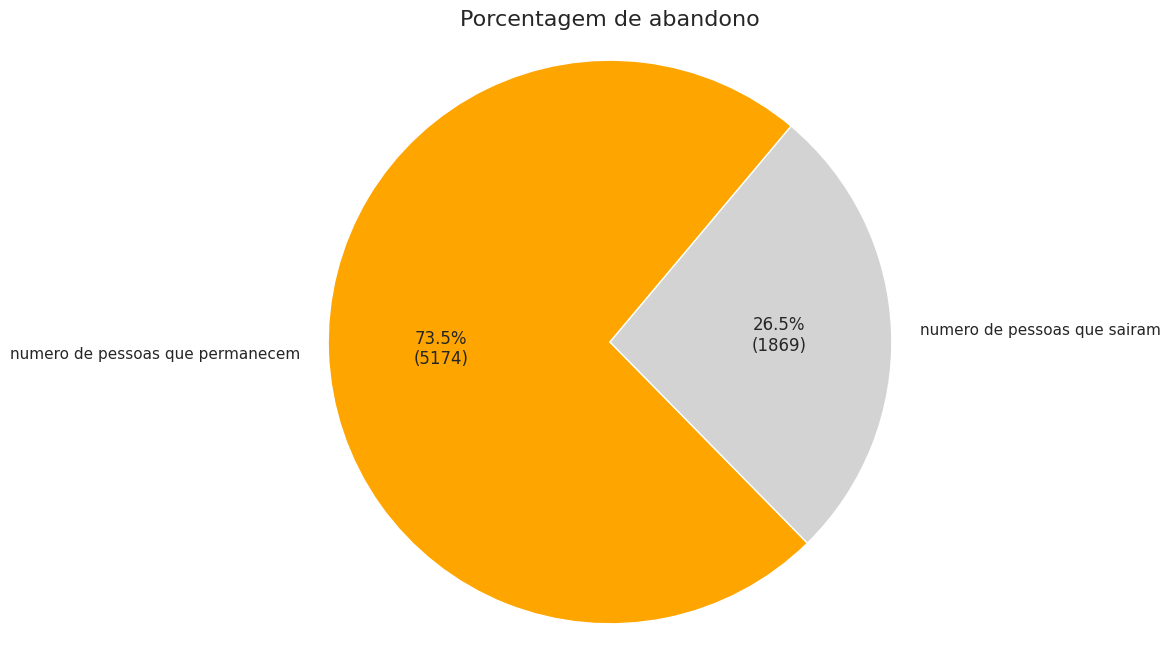

In [174]:
abandono_counts = df['Abandono'].value_counts()
colors = ['lightgrey' if abandono else 'orange' for abandono in abandono_counts.index]
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(abandono_counts,
                                   labels=['numero de pessoas que sairam' if abandono else 'numero de pessoas que permanecem' for abandono in abandono_counts.index],
                                   colors=colors,
                                   autopct='%1.1f%%',
                                   startangle=50)

for i, autotext in enumerate(autotexts):
    autotext.set_text(autotext.get_text() + f'\n({abandono_counts.iloc[i]})')

plt.title('Porcentagem de abandono', fontsize=16)
plt.axis('equal')
plt.show()

##Contagens de Evasão

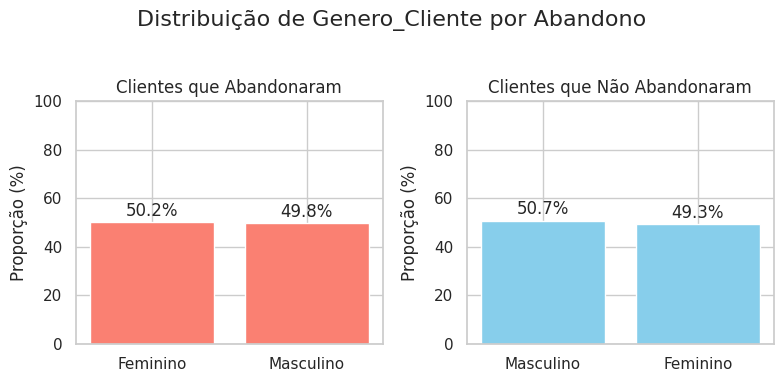

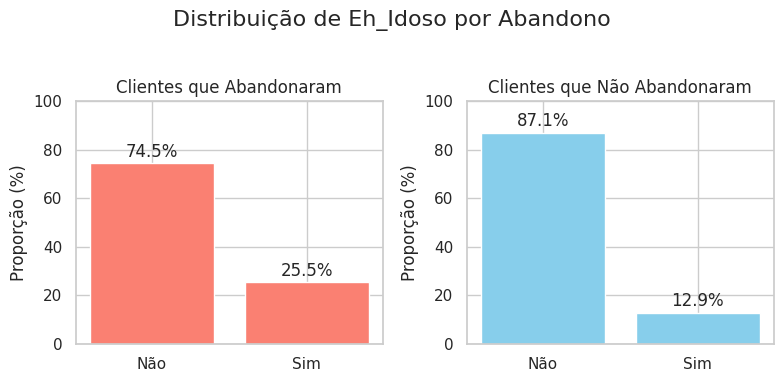

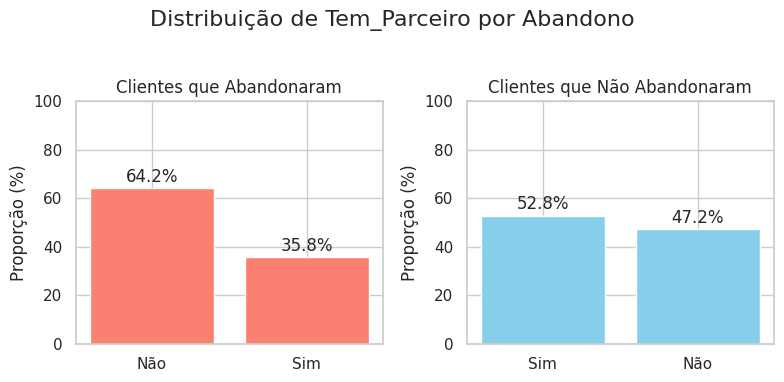

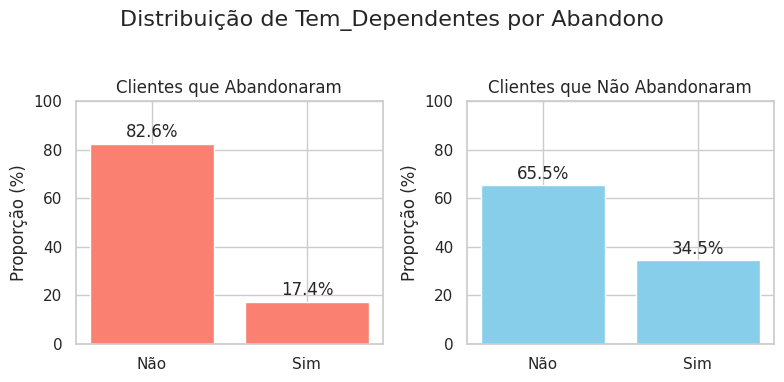

In [175]:
# gráficos de barras relacionando Genero_Cliente, Eh_Idoso, Tem_Parceiro e Tem_Dependentes a distribuição de abandono
colunas_interesse = ['Genero_Cliente', 'Eh_Idoso', 'Tem_Parceiro', 'Tem_Dependentes']

for coluna in colunas_interesse:
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle(f'Distribuição de {coluna} por Abandono', fontsize=16)
    df_abandono_true = df[df['Abandono'] == True]
    counts_true = df_abandono_true[coluna].value_counts(normalize=True) * 100
    counts_true.index = counts_true.index.map({True: 'Sim', False: 'Não', 'Male': 'Masculino', 'Female': 'Feminino'})
    bars_true = axes[0].bar(counts_true.index, counts_true.values, color='salmon')
    axes[0].set_title('Clientes que Abandonaram')
    axes[0].set_ylabel('Proporção (%)')
    axes[0].set_ylim(0, 100)
    axes[0].tick_params(axis='x', rotation=0)
    for bar in bars_true:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%',
                ha='center', va='bottom')

    df_abandono_false = df[df['Abandono'] == False]
    counts_false = df_abandono_false[coluna].value_counts(normalize=True) * 100
    counts_false.index = counts_false.index.map({True: 'Sim', False: 'Não', 'Male': 'Masculino', 'Female': 'Feminino'})


    bars_false = axes[1].bar(counts_false.index, counts_false.values, color='skyblue')
    axes[1].set_title('Clientes que Não Abandonaram')
    axes[1].set_ylabel('Proporção (%)')
    axes[1].set_ylim(0, 100)
    axes[1].tick_params(axis='x', rotation=0)
    for bar in bars_false:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%',
                ha='center', va='bottom')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


<ipython-input-176-2216617349>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



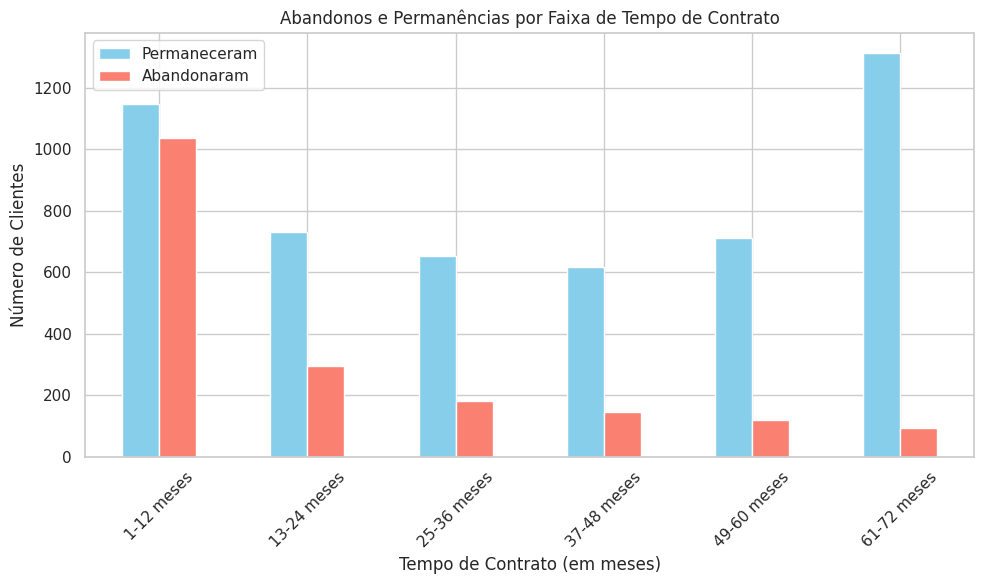

In [176]:
# Analizando o numero de abandono por tempo do cliente na base.
bins = range(0, df['Meses_Cliente'].max() + 12, 12)
labels = [f'{i+1}-{i+12} meses' for i in bins[:-1]]

faixas_tempo = pd.cut(df['Meses_Cliente'], bins=bins, labels=labels, right=True, include_lowest=True)
df_temp = pd.DataFrame({'Faixa_Tempo': faixas_tempo, 'Abandono': df['Abandono']})
contagem = df_temp.groupby(['Faixa_Tempo', 'Abandono']).size().unstack(fill_value=0)

contagem.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Abandonos e Permanências por Faixa de Tempo de Contrato')
plt.xlabel('Tempo de Contrato (em meses)')
plt.ylabel('Número de Clientes')
plt.legend(['Permaneceram', 'Abandonaram'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


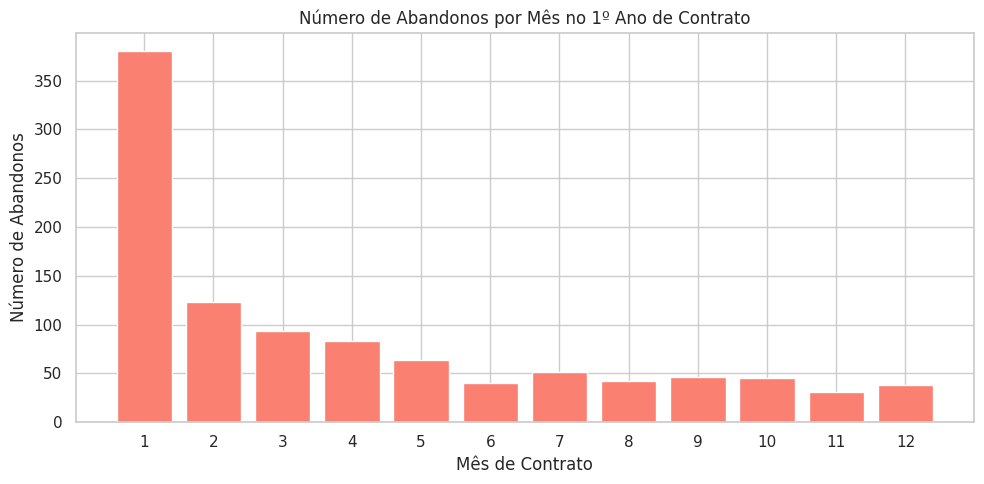

In [177]:
# A maioria do abandono esta no primeiro ano então quis ver apenas ele.
df_primeiro_ano = df[df['Meses_Cliente'] <= 12]
abandono_mensal = df_primeiro_ano[df_primeiro_ano['Abandono'] == True]['Meses_Cliente'].value_counts().sort_index()
abandono_mensal = abandono_mensal.reindex(range(1, 13), fill_value=0)

plt.figure(figsize=(10, 5))
plt.bar(abandono_mensal.index, abandono_mensal.values, color='salmon')
plt.title('Número de Abandonos por Mês no 1º Ano de Contrato')
plt.xlabel('Mês de Contrato')
plt.ylabel('Número de Abandonos')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


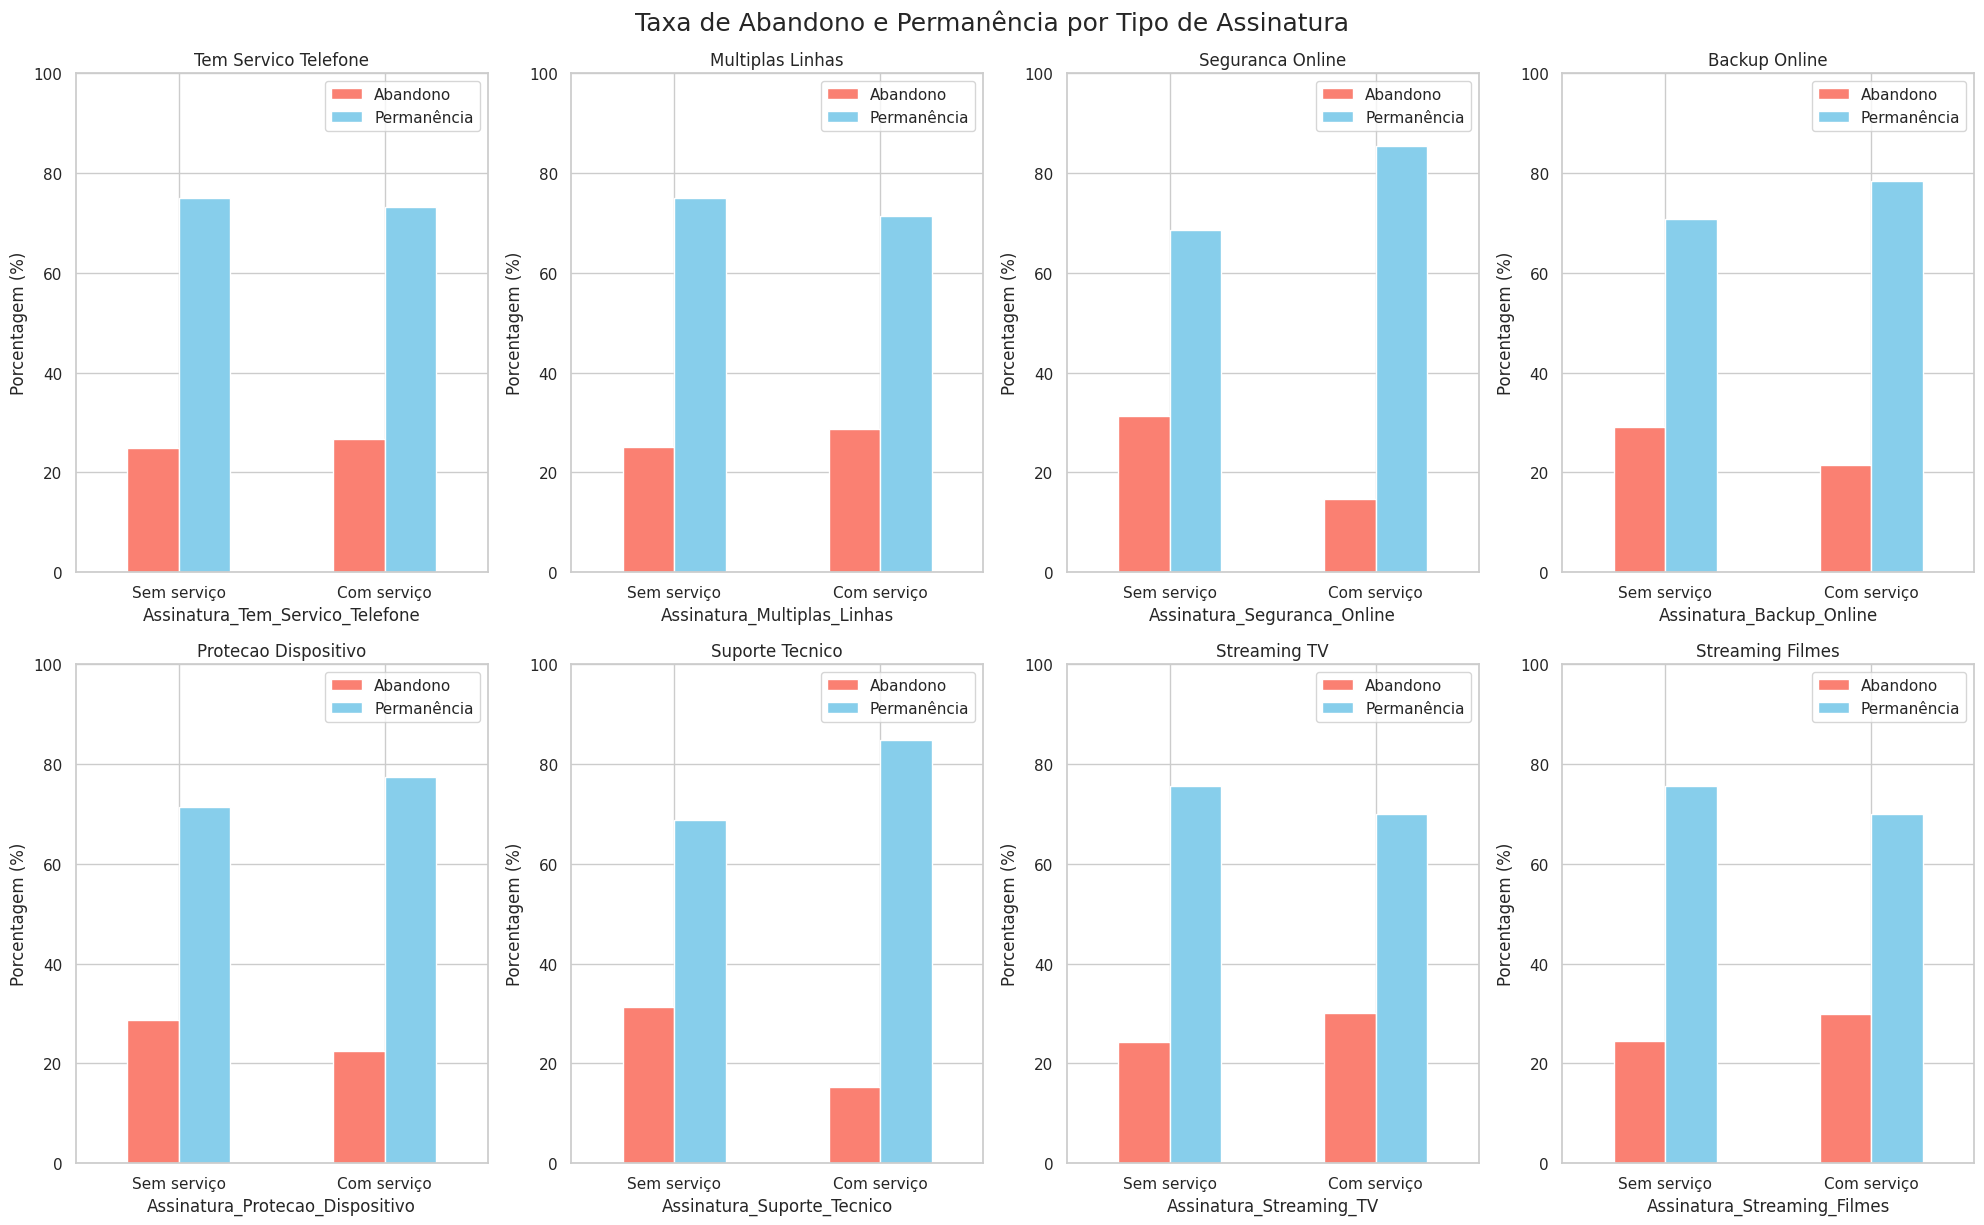

In [178]:
# gráficos de barras relacionando todos os tipos de assinatura a distribuição de abandono
colunas_assinatura = [
    'Assinatura_Tem_Servico_Telefone',
    'Assinatura_Multiplas_Linhas',
    'Assinatura_Seguranca_Online',
    'Assinatura_Backup_Online',
    'Assinatura_Protecao_Dispositivo',
    'Assinatura_Suporte_Tecnico',
    'Assinatura_Streaming_TV',
    'Assinatura_Streaming_Filmes'
]

plt.figure(figsize=(20, 12))

for i, col in enumerate(colunas_assinatura):
    plt.subplot(2, 4, i + 1)
    grupo = df.groupby([col, 'Abandono']).size().unstack(fill_value=0)
    total = grupo.sum(axis=1)
    abandono_perc = (grupo[True] / total * 100).rename('Abandono')
    permanencia_perc = (grupo[False] / total * 100).rename('Permanência')
    result = pd.concat([abandono_perc, permanencia_perc], axis=1)
    result.index = result.index.map({True: 'Com serviço', False: 'Sem serviço'})
    result.plot(kind='bar', stacked=False, ax=plt.gca(), color=['salmon', 'skyblue'])
    plt.title(col.replace('Assinatura_', '').replace('_', ' '))
    plt.ylabel('Porcentagem (%)')
    plt.xticks(rotation=0)
    plt.ylim(0, 100)

plt.tight_layout()
plt.suptitle('Taxa de Abandono e Permanência por Tipo de Assinatura', fontsize=18, y=1.02)
plt.show()


<ipython-input-179-4183018966>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 800x600 with 0 Axes>

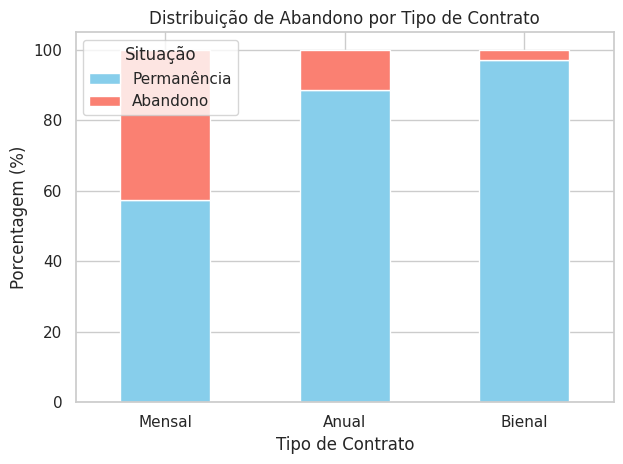

In [179]:
# Relacionando o tipo de contrato com o abandono
contrato_abandono = df.groupby('Tipo_Contrato')['Abandono'].value_counts(normalize=True).unstack() * 100
contrato_abandono = contrato_abandono.rename(columns={True: 'Abandono', False: 'Permanência'}).fillna(0)
contrato_abandono = contrato_abandono[['Permanência', 'Abandono']]

contrato_abandono.index = contrato_abandono.index.map({
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bienal'
})

plt.figure(figsize=(8, 6))
contrato_abandono.plot(
    kind='bar',
    stacked=True,
    color=['skyblue', 'salmon']
)

plt.title('Distribuição de Abandono por Tipo de Contrato')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
plt.legend(title='Situação')
plt.tight_layout()
plt.show()

<ipython-input-180-1625214844>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 800x600 with 0 Axes>

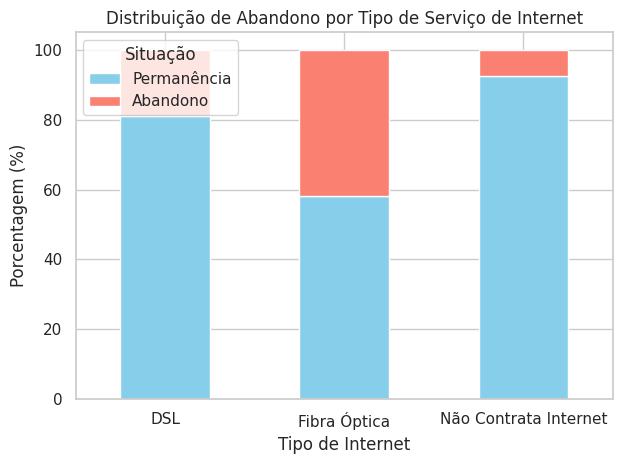

In [180]:
# Relaciona o tipo de serviço de internet com o abandono
internet_abandono = df.groupby('Tipo_Servico_Internet')['Abandono'].value_counts(normalize=True).unstack() * 100
internet_abandono = internet_abandono.rename(columns={True: 'Abandono', False: 'Permanência'}).fillna(0)
internet_abandono = internet_abandono[['Permanência', 'Abandono']]  # Abandono no topo

internet_abandono.index = internet_abandono.index.map({
    'No': 'Não Contrata Internet',
    'DSL': 'DSL',
    'Fiber optic': 'Fibra Óptica'
})

plt.figure(figsize=(8, 6))
internet_abandono.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

plt.title('Distribuição de Abandono por Tipo de Serviço de Internet')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Tipo de Internet')
plt.xticks(rotation=0)
plt.legend(title='Situação')
plt.tight_layout()
plt.show()

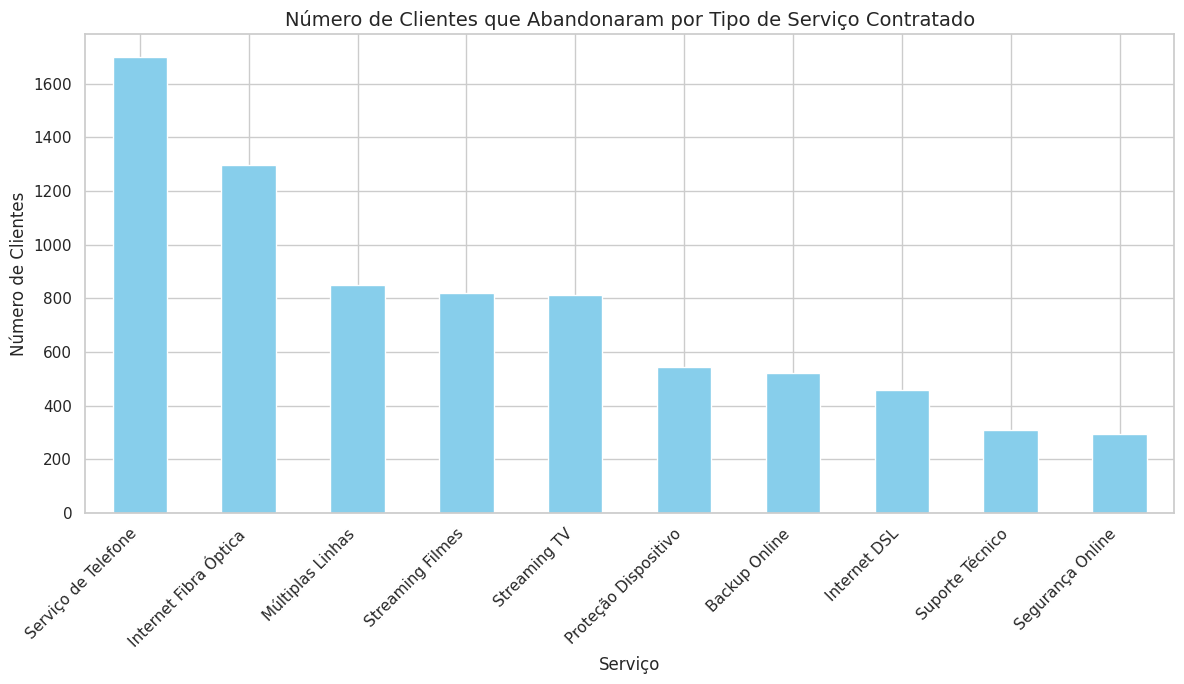

In [181]:
# mostra quais serviços as pessoas que abandonaram contratavam mais
df_abandonaram = df[df['Abandono'] == True].copy()

colunas_servicos_binarias = [
    'Assinatura_Tem_Servico_Telefone',
    'Assinatura_Multiplas_Linhas',
    'Assinatura_Seguranca_Online',
    'Assinatura_Backup_Online',
    'Assinatura_Protecao_Dispositivo',
    'Assinatura_Suporte_Tecnico',
    'Assinatura_Streaming_TV',
    'Assinatura_Streaming_Filmes'
]

servicos_abandonaram = df_abandonaram[colunas_servicos_binarias].sum().sort_values(ascending=False)
internet_abandonaram = df_abandonaram['Tipo_Servico_Internet'].value_counts()
if 'No' in internet_abandonaram.index:
    internet_abandonaram = internet_abandonaram.drop('No')

servicos_abandonaram_renomeado = servicos_abandonaram.rename({
    'Assinatura_Tem_Servico_Telefone': 'Serviço de Telefone',
    'Assinatura_Multiplas_Linhas': 'Múltiplas Linhas',
    'Assinatura_Seguranca_Online': 'Segurança Online',
    'Assinatura_Backup_Online': 'Backup Online',
    'Assinatura_Protecao_Dispositivo': 'Proteção Dispositivo',
    'Assinatura_Suporte_Tecnico': 'Suporte Técnico',
    'Assinatura_Streaming_TV': 'Streaming TV',
    'Assinatura_Streaming_Filmes': 'Streaming Filmes'
})

internet_abandonaram_renomeado = internet_abandonaram.rename({
    'DSL': 'Internet DSL',
    'Fiber optic': 'Internet Fibra Óptica'
})

todos_servicos_abandonaram = pd.concat([servicos_abandonaram_renomeado, internet_abandonaram_renomeado])
todos_servicos_abandonaram = todos_servicos_abandonaram.sort_values(ascending=False)

plt.figure(figsize=(12, 7))
todos_servicos_abandonaram.plot(kind='bar', color='skyblue')
plt.title('Número de Clientes que Abandonaram por Tipo de Serviço Contratado', fontsize=14)
plt.xlabel('Serviço', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


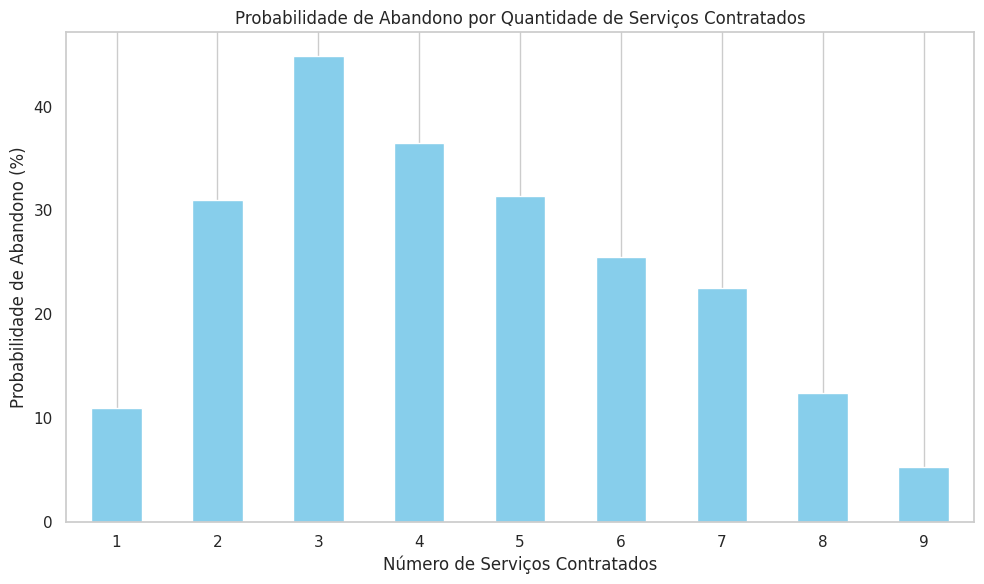

In [182]:
# compara o numero de serviços contratados ao abandono
colunas_servicos = [
    'Assinatura_Tem_Servico_Telefone',
    'Assinatura_Multiplas_Linhas',
    'Assinatura_Seguranca_Online',
    'Assinatura_Backup_Online',
    'Assinatura_Protecao_Dispositivo',
    'Assinatura_Suporte_Tecnico',
    'Assinatura_Streaming_TV',
    'Assinatura_Streaming_Filmes'
]

numero_servicos = df[colunas_servicos].sum(axis=1) + df['Tipo_Servico_Internet'].apply(lambda x: 1 if x != 'No' else 0)
df_temp = df[['Abandono']].copy()
df_temp['Numero_Servicos'] = numero_servicos
prob_abandono_por_servico = df_temp.groupby('Numero_Servicos')['Abandono'].value_counts(normalize=True).unstack().fillna(0)
if True not in prob_abandono_por_servico.columns:
    prob_abandono_por_servico[True] = 0

prob_abandono = prob_abandono_por_servico.rename(columns={True: 'Probabilidade_Abandono'})['Probabilidade_Abandono'] * 100

plt.figure(figsize=(10, 6))
prob_abandono.plot(kind='bar', color='skyblue')
plt.title('Probabilidade de Abandono por Quantidade de Serviços Contratados')
plt.xlabel('Número de Serviços Contratados')
plt.ylabel('Probabilidade de Abandono (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


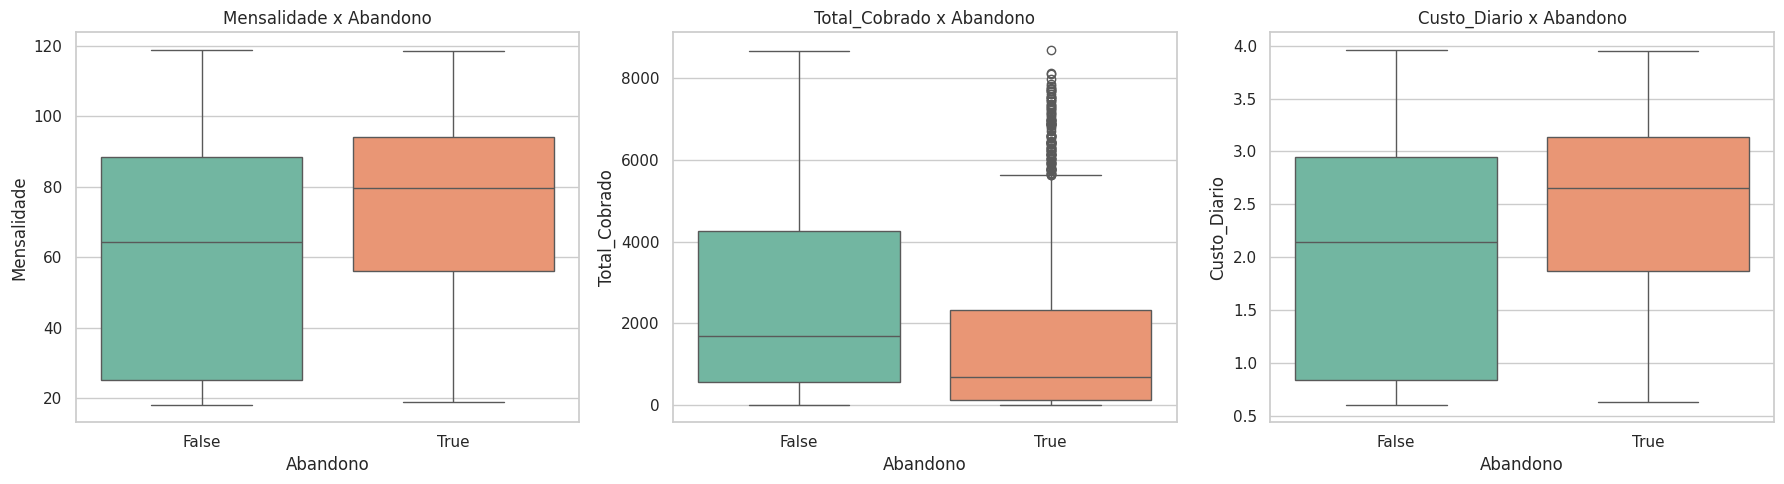

In [183]:
sns.set(style='whitegrid')
plt.figure(figsize=(18, 5))
colunas_numericas = ['Mensalidade', 'Total_Cobrado', 'Custo_Diario']

for i, col in enumerate(colunas_numericas):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Abandono',y=col, hue='Abandono', data=df, palette='Set2', legend=False)
    plt.title(f'{col} x Abandono')
    plt.xlabel('Abandono')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


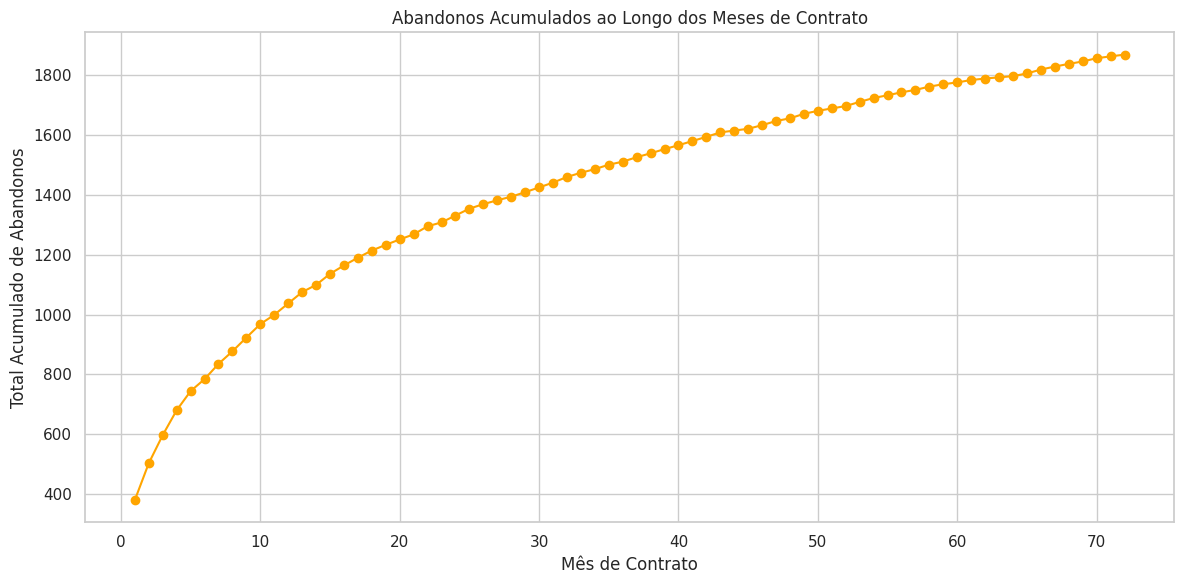

In [184]:
# Confirmando que as principais desistencias são no primeiro ano
df_abandono = df[df['Abandono'] == True]
contagem_meses = df_abandono['Meses_Cliente'].value_counts().sort_index()
abandonos_acumulados = contagem_meses.cumsum()

plt.figure(figsize=(12, 6))
abandonos_acumulados.plot(kind='line', marker='o', color='orange')
plt.title('Abandonos Acumulados ao Longo dos Meses de Contrato')
plt.xlabel('Mês de Contrato')
plt.ylabel('Total Acumulado de Abandonos')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-185-3044527887>:29: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



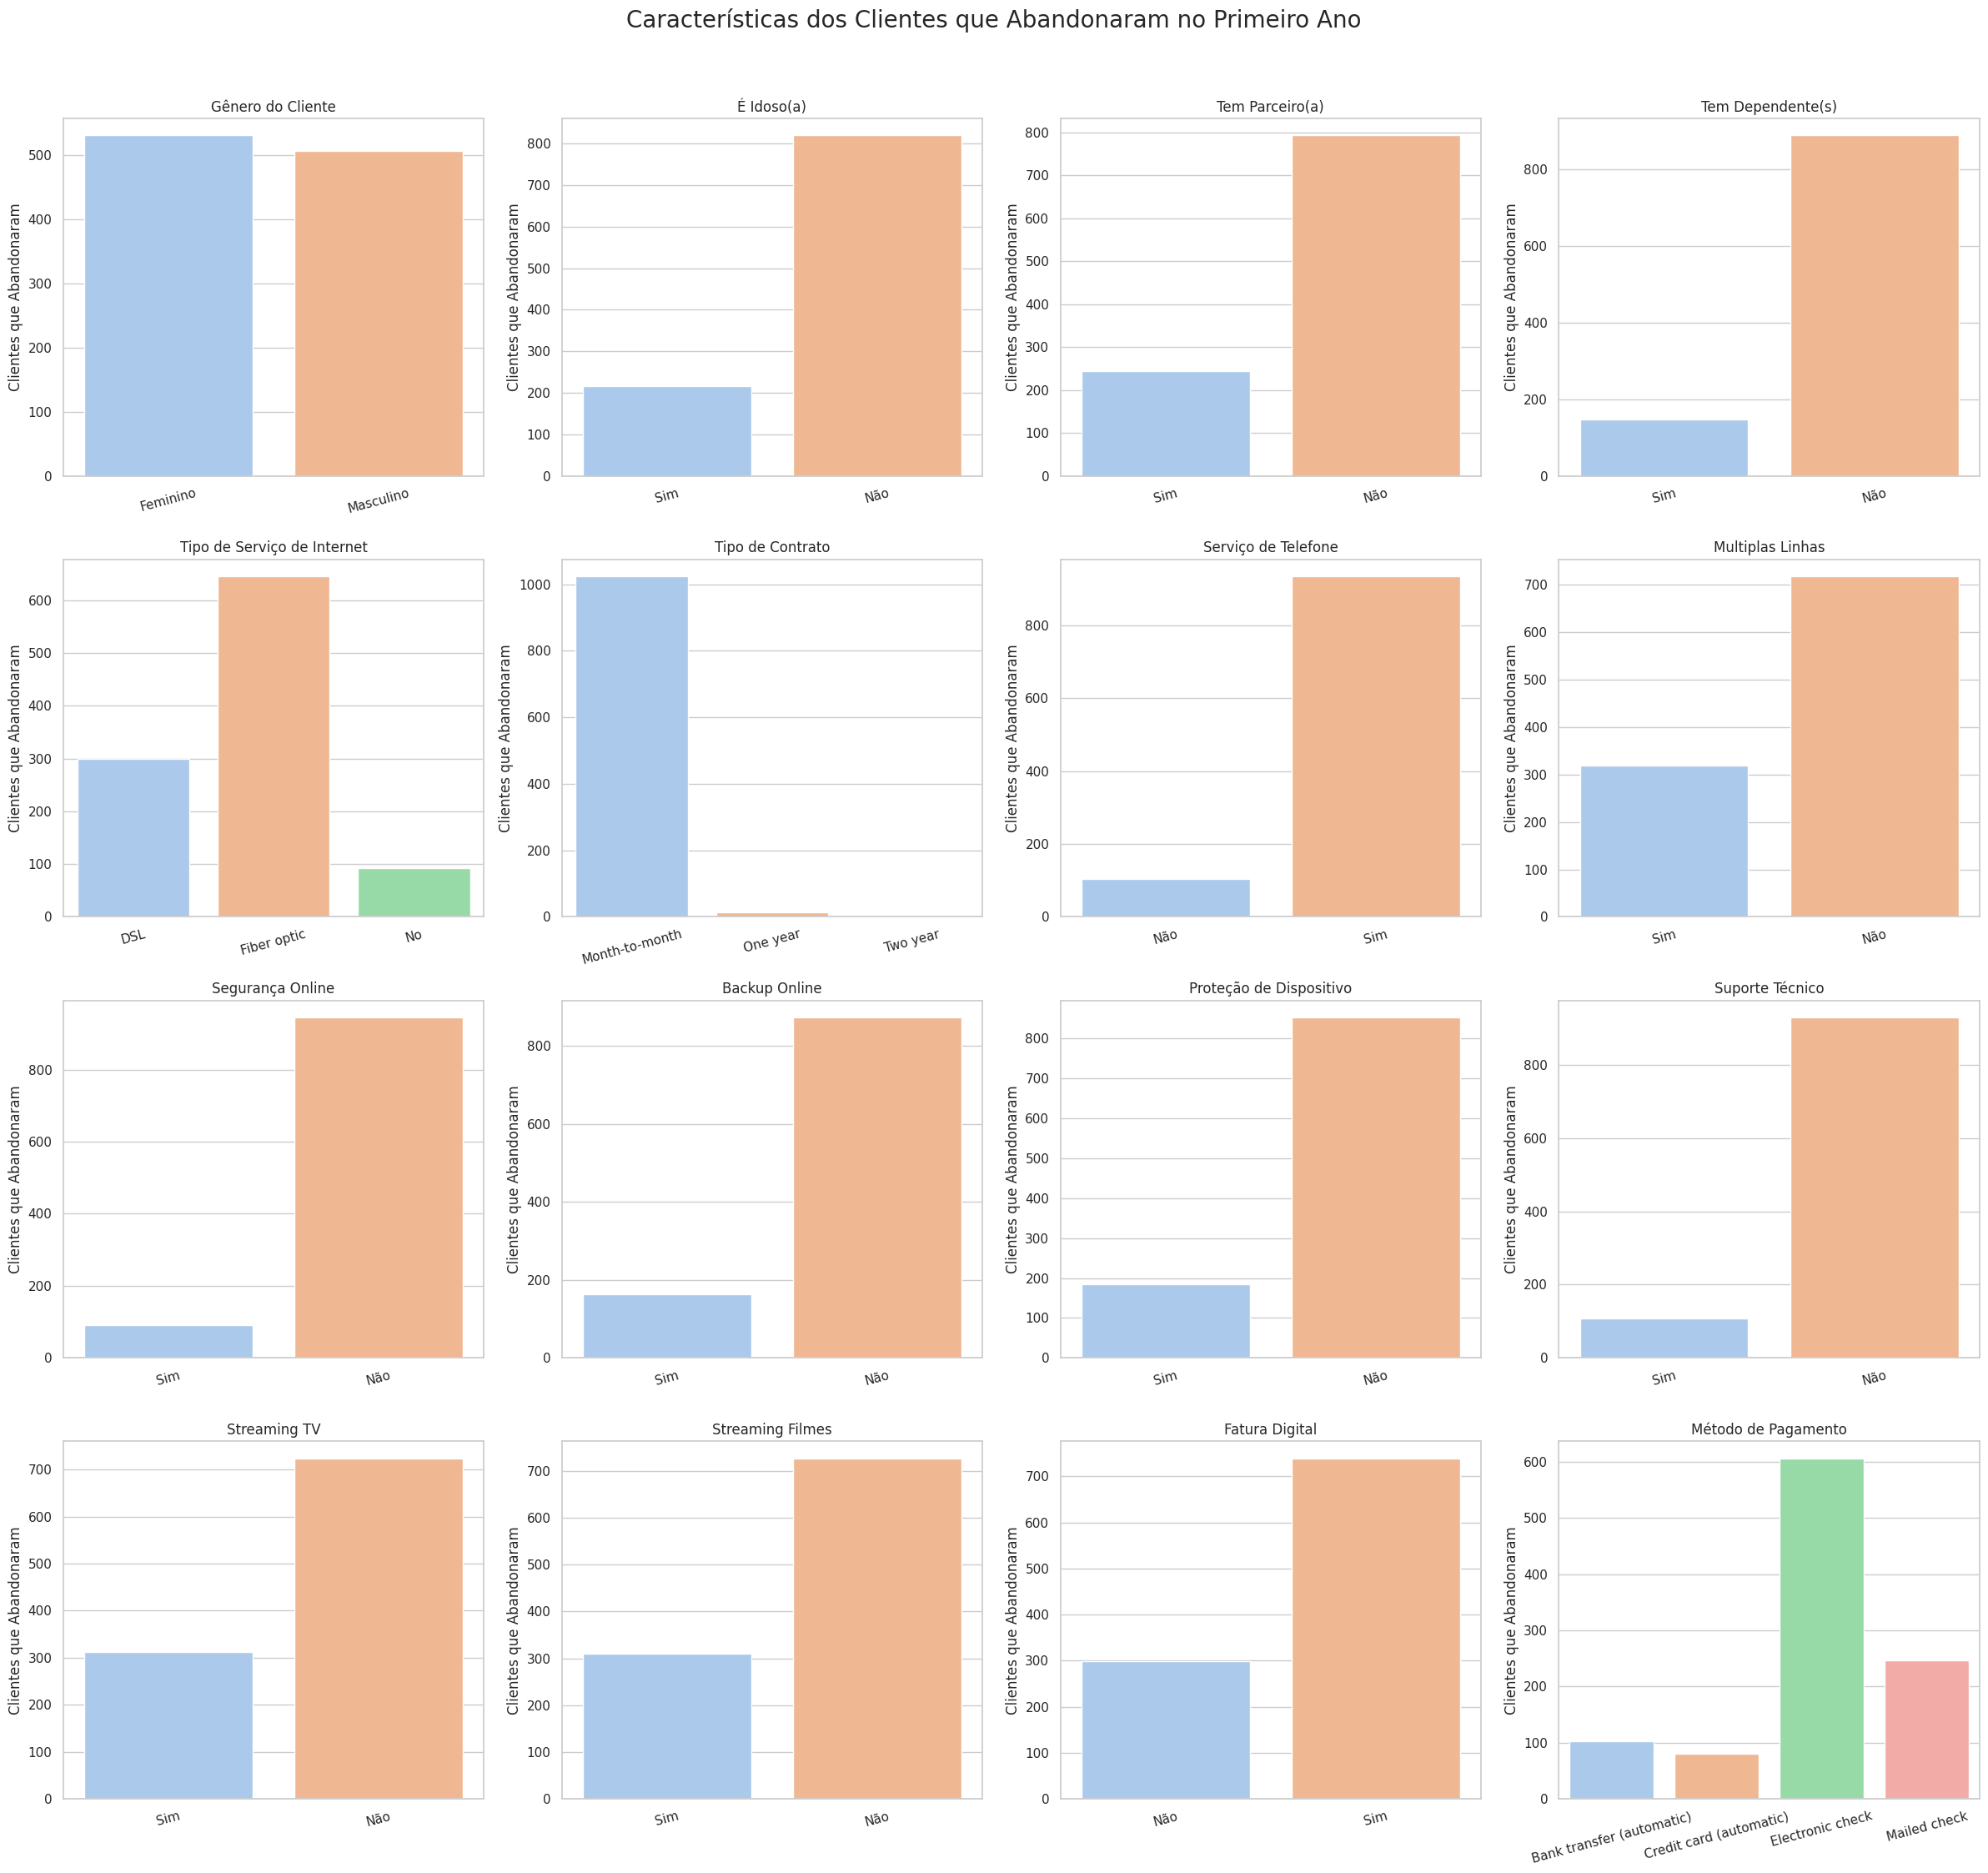

In [185]:
# Verificando informações dos clientes que abandonaram no primeiro ano
df_abandono_ano1 = df[(df['Meses_Cliente'] <= 12) & (df['Abandono'] == True)]

variaveis = [
    'Genero_Cliente', 'Eh_Idoso', 'Tem_Parceiro', 'Tem_Dependentes',
    'Tipo_Servico_Internet', 'Tipo_Contrato',
    'Assinatura_Tem_Servico_Telefone', 'Assinatura_Multiplas_Linhas',
    'Assinatura_Seguranca_Online', 'Assinatura_Backup_Online',
    'Assinatura_Protecao_Dispositivo', 'Assinatura_Suporte_Tecnico',
    'Assinatura_Streaming_TV', 'Assinatura_Streaming_Filmes',
    'Fatura_Digital', 'Metodo_Pagamento'
]

titulos_legiveis = [
    'Gênero do Cliente', 'É Idoso(a)', 'Tem Parceiro(a)', 'Tem Dependente(s)',
    'Tipo de Serviço de Internet', 'Tipo de Contrato',
    'Serviço de Telefone', 'Multiplas Linhas',
    'Segurança Online', 'Backup Online',
    'Proteção de Dispositivo', 'Suporte Técnico',
    'Streaming TV', 'Streaming Filmes',
    'Fatura Digital', 'Método de Pagamento'
]

plt.figure(figsize=(24, 22))
sns.set(style='whitegrid')

for i, var in enumerate(variaveis):
    plt.subplot(4, 4, i + 1)
    dados = df_abandono_ano1[var].replace({
        True: 'Sim', False: 'Não',
        'Male': 'Masculino', 'Female': 'Feminino'
    })
    contagem = dados.value_counts().sort_values()
    sns.barplot(x=contagem.index, y=contagem.values, hue=contagem.index, palette='pastel', legend=False)
    plt.title(titulos_legiveis[i])
    plt.ylabel('Clientes que Abandonaram')
    plt.xlabel('')
    plt.xticks(rotation=15)

plt.suptitle('Características dos Clientes que Abandonaram no Primeiro Ano', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


<ipython-input-186-978325712>:29: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



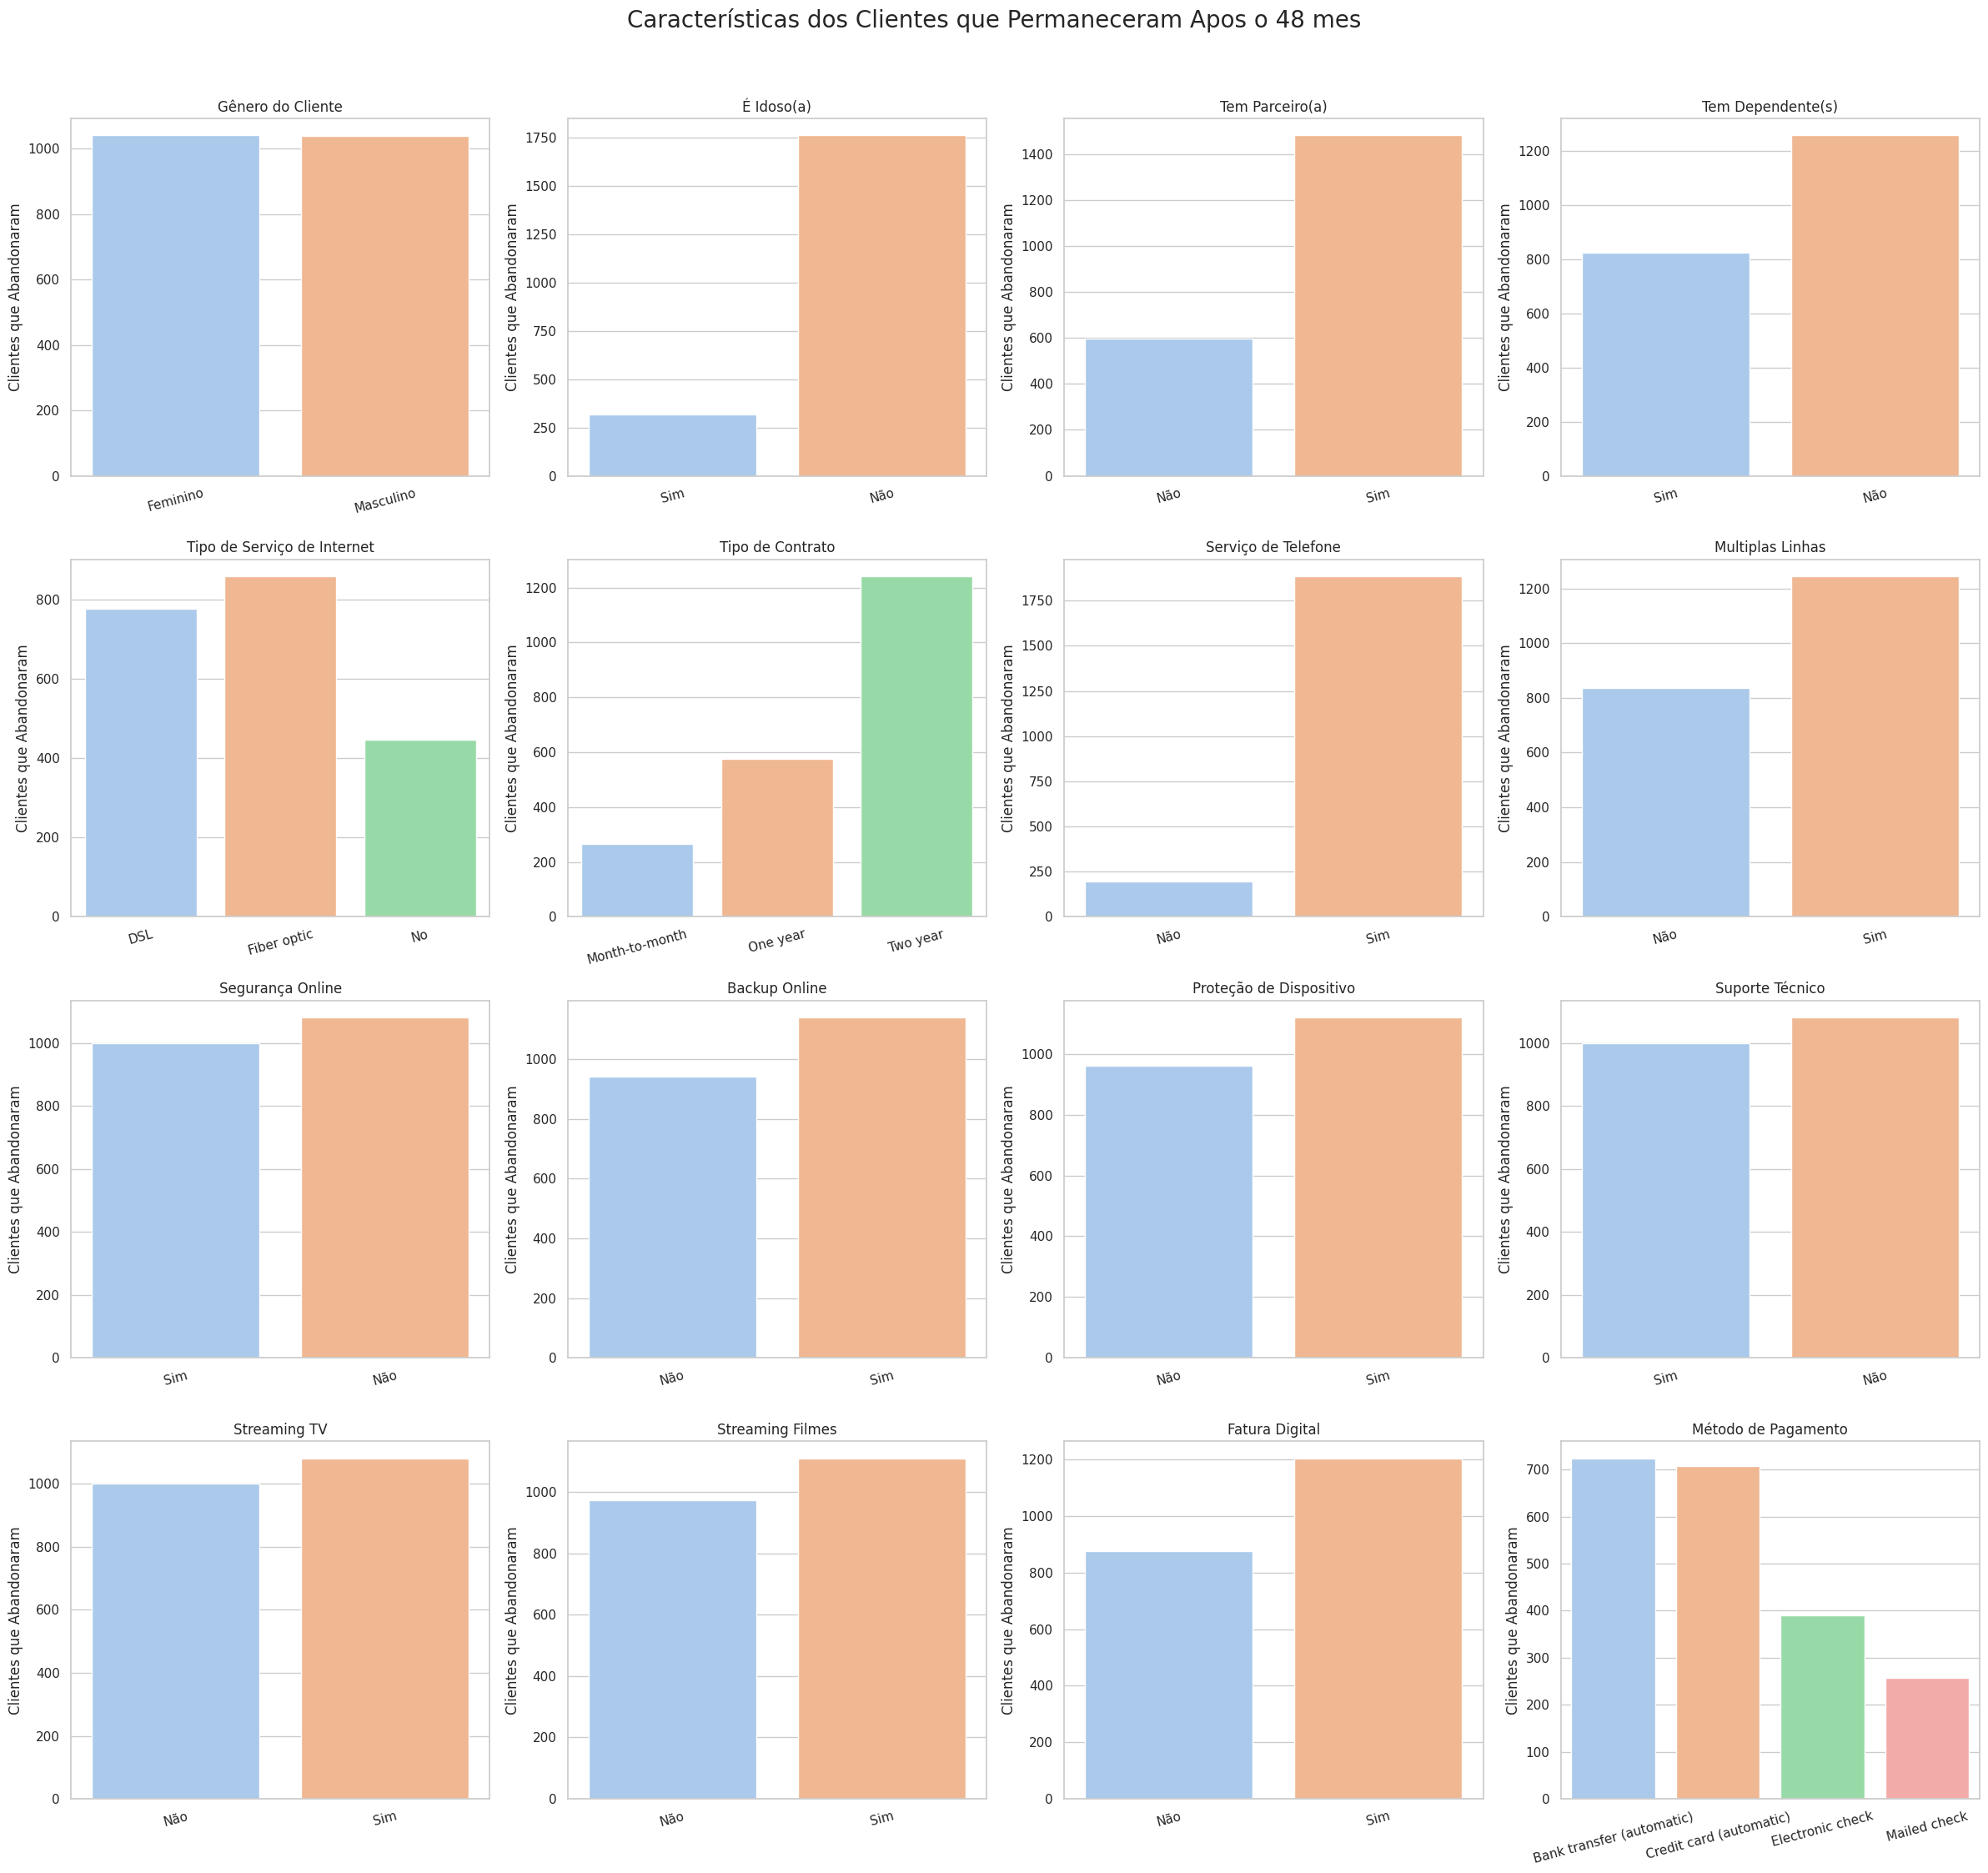

In [186]:
# Verificando informações dos clientes que permaneceram apos o 48 mes
df_abandono_ano1 = df[(df['Meses_Cliente'] >= 48) & (df['Abandono'] == False)]

variaveis = [
    'Genero_Cliente', 'Eh_Idoso', 'Tem_Parceiro', 'Tem_Dependentes',
    'Tipo_Servico_Internet', 'Tipo_Contrato',
    'Assinatura_Tem_Servico_Telefone', 'Assinatura_Multiplas_Linhas',
    'Assinatura_Seguranca_Online', 'Assinatura_Backup_Online',
    'Assinatura_Protecao_Dispositivo', 'Assinatura_Suporte_Tecnico',
    'Assinatura_Streaming_TV', 'Assinatura_Streaming_Filmes',
    'Fatura_Digital', 'Metodo_Pagamento'
]

titulos_legiveis = [
    'Gênero do Cliente', 'É Idoso(a)', 'Tem Parceiro(a)', 'Tem Dependente(s)',
    'Tipo de Serviço de Internet', 'Tipo de Contrato',
    'Serviço de Telefone', 'Multiplas Linhas',
    'Segurança Online', 'Backup Online',
    'Proteção de Dispositivo', 'Suporte Técnico',
    'Streaming TV', 'Streaming Filmes',
    'Fatura Digital', 'Método de Pagamento'
]

plt.figure(figsize=(24, 22))
sns.set(style='whitegrid')

for i, var in enumerate(variaveis):
    plt.subplot(4, 4, i + 1)
    dados = df_abandono_ano1[var].replace({
        True: 'Sim', False: 'Não',
        'Male': 'Masculino', 'Female': 'Feminino'
    })
    contagem = dados.value_counts().sort_values()
    sns.barplot(x=contagem.index, y=contagem.values, hue=contagem.index, palette='pastel', legend=False)
    plt.title(titulos_legiveis[i])
    plt.ylabel('Clientes que Abandonaram')
    plt.xlabel('')
    plt.xticks(rotation=15)

plt.suptitle('Características dos Clientes que Permaneceram Apos o 48 mes', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


# 💡📊Relatório de Análise de Evasão de Clientes (Churn) - TelecomX 📊💡

Este relatório detalha o processo de análise de dados realizado para compreender os fatores que contribuem para a evasão de clientes (Churn) na empresa de telecomunicações TelecomX. O objetivo principal é identificar padrões e comportamentos que levem os clientes a cancelar seus serviços, fornecendo insights acionáveis para estratégias de retenção. 🚀

---

##  🧭 Introdução 🎯

A evasão de clientes, ou Churn, é um desafio crítico para empresas de telecomunicações. Perder clientes não apenas impacta a receita diretamente, mas também pode aumentar os custos de aquisição de novos clientes e prejudicar a reputação da marca. Compreender os motivos por trás do Churn é fundamental para desenvolver estratégias de retenção eficazes e garantir a sustentabilidade do negócio. 🛡️

Neste projeto, realizamos uma análise exploratória de um conjunto de dados de clientes da TelecomX para:
* Identificar as características dos clientes que abandonam o serviço. 🕵️‍♀️
* Analisar a distribuição de variáveis-chave e suas relações com o Churn. 🔄
* Fornecer recomendações baseadas em dados para reduzir a taxa de evasão. ✅

---

##  🧹  Limpeza e Tratamento de Dados

Para garantir a qualidade das análises, foram realizadas as seguintes etapas de preparação dos dados:

- **Importação dos dados** via arquivo CSV.
- Verificação e tratamento de valores ausentes.
- Conversão de colunas booleanas e categóricas para formatos adequados.

### 📌 Importação dos Dados

* **Fonte:** Os dados foram importados de um arquivo JSON disponível em https://stackoverflow.com/questions/74623261/should-i-save-json-data-inside-a-json-file-or-is-it-okay-to-save-it-inside-a.
* **Ferramentas:** A biblioteca `pandas` foi utilizada para carregar os dados em um DataFrame, facilitando a manipulação e análise.

---

## 🔍 Análise Exploratória de Dados

Diversas visualizações e análises foram aplicadas para entender melhor o comportamento dos clientes, tais como:

### 📘 Renomear colunas e dados - Novo Dicionário de Dados

| Coluna                           | Tipo de Dado    | Descrição                                                                 |
|----------------------------------|------------------|---------------------------------------------------------------------------|
| `ID_Cliente`                     | String           | Identificador único de cada cliente.                                     |
| `Abandono`                       | Boolean          | Indica se o cliente abandonou o serviço.|
| `Genero_Cliente`                 | Category | Gênero do cliente (`Male` ou `Female`).                              |
| `Eh_Idoso`                       | Boolean          | Indica se o cliente é idoso.                                             |
| `Tem_Parceiro`                   | Boolean          | Cliente tem parceiro(a).                                                 |
| `Tem_Dependentes`               | Boolean          | Cliente possui dependentes.                                              |
| `Meses_Cliente`                  | Inteiro          | Tempo em meses que o cliente está com a empresa.                         |
| `Assinatura_Tem_Servico_Telefone`| Boolean          | Indica se o cliente possui serviço telefônico.                           |
| `Assinatura_Multiplas_Linhas`    | Boolean          | Cliente tem múltiplas linhas telefônicas.                                |
| `Tipo_Servico_Internet`          | Category | Tipo de serviço de internet (`No`, `DSL` ou `Fiber optic`).         |
| `Assinatura_Seguranca_Online`    | Boolean          | Cliente assinou segurança online.                                        |
| `Assinatura_Backup_Online`       | Boolean          | Cliente assinou backup online.                                           |
| `Assinatura_Protecao_Dispositivo`| Boolean          | Cliente assinou proteção de dispositivo.                                 |
| `Assinatura_Suporte_Tecnico`     | Boolean          | Cliente assinou suporte técnico premium.                                 |
| `Assinatura_Streaming_TV`        | Boolean          | Cliente assinou serviço de TV por streaming.                             |
| `Assinatura_Streaming_Filmes`    | Boolean          | Cliente assinou filmes por streaming.                                    |
| `Tipo_Contrato`                  | Category | Tipo de contrato: (`Mensal`, `Anual`, `Bianual`).                                |
| `Fatura_Digital`                 | Boolean          | Indica se o cliente recebe a fatura digital.                             |
| `Metodo_Pagamento`               | Category | Método de pagamento utilizado pelo cliente.                         |
| `Mensalidade`                    | Float            | Valor da mensalidade paga pelo cliente.                                  |
| `Total_Cobrado`                  | Float            | Valor total já cobrado do cliente.                                       |
| `Custo_Diario`                   | Float            | Custo médio por dia (gerado na análise).                                 |

### 📌 Distribuição de Atributos Demográficos

- Gráficos de barras mostraram a distribuição de clientes por:
  - Gênero
  - Idade (idoso ou não)
  - Possuir parceiro(a)
  - Possuir dependentes

### 📌 Análise Temporal

- A maioria dos abandonos ocorre **nos primeiros 12 meses**, principalmente **no 1º mês de contrato**.
- Histogramas revelaram essa tendência de churn precoce.

### 📌 Serviços Contratados

- Foi observado que **não há uma variação significativa** no número de serviços contratados entre clientes que abandonaram e os que permaneceram.

- A presença ou ausência de serviços como **streaming, backup online e segurança online** não demonstrou forte correlação com a evasão.

- Ou seja, **a quantidade de serviços contratados isoladamente não parece ser um fator determinante** para o churn.

### 📌 Correlação com Variáveis Numéricas

- **Custo Diário**, **Mensalidade** e **Total Cobrado** foram comparados com churn.
- A **matriz de correlação** apontou relação fraca a moderada entre `Total_Cobrado` e `Abandono`, já que o **abandono ocorre principalmente nos primeiros meses**.


---

## 🧠 Conclusões e Insights

- **Clientes no primeiro mês de contrato** têm a maior taxa de Abandono, evidenciando uma possível **falha na experiência inicial**.
- **Idosos e clientes com dependentes** apresentam **menor taxa de abandono**.
- **Clientes com mais tempo de permanência tendem a não abandonar o serviço**, especialmente após o primeiro ano.
- As variáveis financeiras como **Mensalidade, Total Cobrado e Custo Diário** apresentam pouca variação entre os grupos, **sugerindo que o preço, por si só, não é o principal fator de evasão**.
- **Clientes com contrato mensal apresentaram maior taxa de abandono**. Isso sugere que a flexibilidade do contrato mensal também facilita a saída, especialmente nos primeiros meses.
- **Contratos de longo prazo** 1 ou 2 anos(Principalmente dois anos) estão associados a uma **maior retenção**.
- Clientes que utilizam **pagamento automático (como Transferencia Bancaria Automatica e Cartão de Credito) apresentam menores taxas de evasão**.
- Quem escolhe **pagamentos manuais (boleto, cheque eletrônico) tendem a abandonar com mais frequência**.
---

## 💡 Recomendações

- **Aprimorar a Experiência Inicial do Cliente✨**
   - A primeira impressão é decisiva. Clientes que abandonam no **primeiro mês** representam a maior taxa de evasão, além de gerar prejuízo operacional (instalações, emissão de boletos, suporte inicial).
   - Crie um processo de **onboarding eficiente**, com boas-vindas personalizadas, tutoriais simples e suporte proativo nos primeiros dias.
   - Acompanhe o cliente nos primeiros 30 dias com pesquisas rápidas de satisfação e intervenções preventivas.

- **Incentivar a Adoção de Planos de Longo Prazo💸**
   - Ofereça **descontos atrativos** e benefícios reais para contratos **anuais ou bienais**, como pacotes de serviços adicionais, bônus em mensalidades ou prioridade no suporte.
   - Destaque a economia e as vantagens da fidelização já no momento da adesão, tanto online quanto via equipe de vendas.

- **Estimular Meios de Pagamento Automáticos💳**
   - Promova o uso de **cartão de crédito** e **débito automático** como opções preferenciais, com facilidades como:
     - Descontos exclusivos;
     - Participação em programas de fidelidade;
     - Menos burocracia e maior comodidade.
   - Eduque o cliente sobre os benefícios do pagamento automático no processo de contratação e no pós-venda.

- **Desincentivar o Abandono Precoce🚫**
   - Desenvolva **barreiras suaves à saída precoce**, como:
     - Períodos mínimos contratuais com benefícios condicionais;
     - Ofertas de resgate ou upgrade para quem sinaliza desistência no primeiro mês;


---


